## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [47]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [48]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID").sort_values("Mouse ID", ascending=True, ignore_index=True)

# Display the data table for preview
combined_results.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,30,59.523197,1
1,a203,Infubinol,Female,20,23,35,61.931650,2
2,a203,Infubinol,Female,20,23,25,56.793208,1
3,a203,Infubinol,Female,20,23,20,55.173336,1
4,a203,Infubinol,Female,20,23,15,52.777870,1


In [5]:
# Checking the number of mice.
total_unique_mice = len(combined_results["Mouse ID"].unique())
total_unique_mice

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
combined_results["Duplicate"] = combined_results.duplicated(["Mouse ID", "Timepoint"])
duplicates = combined_results.loc[(combined_results["Duplicate"] == True)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
589,g989,Propriva,Female,21,26,5,47.570392,0,True
591,g989,Propriva,Female,21,26,10,49.880528,0,True
596,g989,Propriva,Female,21,26,0,45.000000,0,True
597,g989,Propriva,Female,21,26,20,55.326122,1,True
598,g989,Propriva,Female,21,26,15,53.442020,0,True


In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_results.loc[(combined_results["Mouse ID"] == "g989")]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
586,g989,Propriva,Female,21,26,0,45.000000,0,False
587,g989,Propriva,Female,21,26,15,51.325852,1,False
588,g989,Propriva,Female,21,26,5,48.786801,0,False
589,g989,Propriva,Female,21,26,5,47.570392,0,True
590,g989,Propriva,Female,21,26,10,51.745156,0,False
591,g989,Propriva,Female,21,26,10,49.880528,0,True
592,g989,Propriva,Female,21,26,35,62.570880,2,False
593,g989,Propriva,Female,21,26,30,59.082294,1,False
594,g989,Propriva,Female,21,26,25,56.045564,1,False
595,g989,Propriva,Female,21,26,20,54.657650,1,False


In [49]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
clean_mouse_data = combined_results.loc[(combined_results["Mouse ID"] != "g989")].drop("Duplicate", axis=1)
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,30,59.523197,1
1,a203,Infubinol,Female,20,23,35,61.931650,2
2,a203,Infubinol,Female,20,23,25,56.793208,1
3,a203,Infubinol,Female,20,23,20,55.173336,1
4,a203,Infubinol,Female,20,23,15,52.777870,1


In [9]:
# Checking the number of mice in the clean DataFrame.
unique_cleaned_mice = len(clean_mouse_data["Mouse ID"].unique())
unique_cleaned_mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grpby_regimen = clean_mouse_data[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"])

mean = grpby_regimen["Tumor Volume (mm3)"].mean()
median = grpby_regimen["Tumor Volume (mm3)"].median()
variance = grpby_regimen["Tumor Volume (mm3)"].var()
std = grpby_regimen["Tumor Volume (mm3)"].std()
sem = grpby_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summ_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume": median,
                          "Variance Tumor Volume": variance,
                          "Standard Deviation Tumor Volume": std,
                          "SEM Tumor Volume": sem})
final_summ = summ_stats.reset_index("Drug Regimen")
final_summ

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
# for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_groups = clean_mouse_data[["Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]}).reset_index("Drug Regimen")
agg_regimen_groups

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

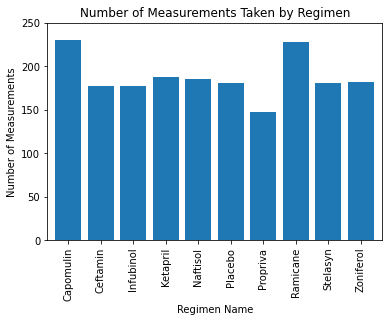

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# set dataset to variable
cnt_msmt = grpby_regimen.count()

# generate bar chart with pandas and set as variable
barplot_pd = cnt_msmt.plot(kind="bar", title="Number of Measurements Taken by Regimen", legend=None, width=.8)

# set titles, labels and apply formatting
barplot_pd.set_ylabel("Number of Measurements")
barplot_pd.set_xlabel("Regimen Name")
barplot_pd.set_ylim((0,max(cnt_msmt["Tumor Volume (mm3)"])+20))

plt.show()


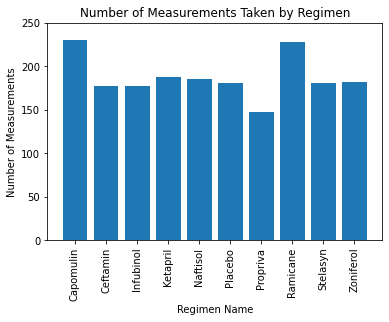

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#generate bar char with pyplot

x_axis = np.arange(len(final_summ["Drug Regimen"]))
tick_locations = [value for value in x_axis]
y_axis = cnt_msmt["Tumor Volume (mm3)"]
plt.bar(x_axis, y_axis, width=.8)
plt.xticks(tick_locations, final_summ["Drug Regimen"], rotation="vertical")
plt.title("Number of Measurements Taken by Regimen")
plt.xlabel("Regimen Name")
plt.ylim((0,max(cnt_msmt["Tumor Volume (mm3)"])+20))
plt.ylabel("Number of Measurements")
plt.show()

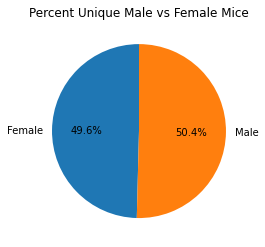

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mouse_data[["Sex", "Mouse ID"]].groupby(["Sex"]).nunique()["Mouse ID"]
gender_group.name = ""

pieplot_pd = gender_group.plot(kind="pie", title="Percent Unique Male vs Female Mice", legend=None, autopct="%1.1f%%", startangle=90)
pieplot_pd
plt.show()

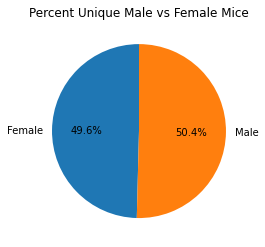

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_mouse_data["Sex"].unique()
size = gender_group.unique()

plt.pie(size, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Percent Unique Male vs Female Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

reduced_tx_df = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"] == "Capomulin") | (clean_mouse_data["Drug Regimen"] == "Ramicane") | (clean_mouse_data["Drug Regimen"] == "Infubinol") | (clean_mouse_data["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
grp_reduced_tx =  reduced_tx_df[["Mouse ID", "Drug Regimen", "Timepoint"]].groupby(["Mouse ID"]).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_vol = pd.merge(study_results, grp_reduced_tx, how="right", on=["Mouse ID","Timepoint"]).sort_values(by="Mouse ID", ascending=True).drop(["Metastatic Sites"], axis = 1).set_index(["Mouse ID"])
final_last_vol = last_vol.reset_index("Mouse ID")
final_last_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane


In [57]:
# Put treatments into a list for a for loop (and later for plot labels)
tx = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in tx:
    tx_reg = final_last_vol.loc[final_last_vol["Drug Regimen"] == treatment]
    vol.append(tx_reg["Tumor Volume (mm3)"])
    quartiles = tx_reg["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    print(f"IQR for {treatment} is {round(iqr,3)}")
    print(f"Lower bound {treatment}: {round(lowerb,3)}, Upper Bound {treatment}: {round(upperb,3)}")
        
    # Determine outliers using upper and lower bounds
    outliers = tx_reg.loc[(tx_reg["Tumor Volume (mm3)"] < lowerb) | (tx_reg["Tumor Volume (mm3)"] > upperb)]
    if outliers.empty == False:
        print(f'***Outlier found in {treatment}:{len(outliers)}')


IQR for Capomulin is 7.782
Lower bound Capomulin: 20.705, Upper Bound Capomulin: 51.832
IQR for Ramicane is 9.099
Lower bound Ramicane: 17.913, Upper Bound Ramicane: 54.307
IQR for Infubinol is 11.477
Lower bound Infubinol: 36.833, Upper Bound Infubinol: 82.741
***Outlier found in Infubinol:1
IQR for Ceftamin is 15.578
Lower bound Ceftamin: 25.355, Upper Bound Ceftamin: 87.666


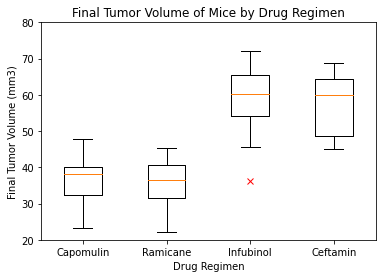

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(vol, sym="rx")
plt.title("Final Tumor Volume of Mice by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4],[treatment for treatment in tx])
plt.ylim(20,80)
plt.show()

## Line and Scatter Plots

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "y793"].sort_values(by="Timepoint",ascending=True)

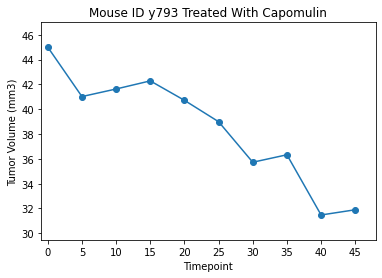

In [60]:
x_axis_cap = cap_mouse["Timepoint"]
y_axis_cap = cap_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis_cap, y_axis_cap, marker="o")
plt.ylim(min(y_axis_cap)-2,max(y_axis_cap)+2)
plt.xlim(min(x_axis_cap)-1, max(x_axis_cap)+3)
plt.xticks(x_axis_cap)
plt.title("Mouse ID y793 Treated With Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_reg = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
cap_reg = cap_reg[["Weight (g)", "Tumor Volume (mm3)"]]
cap_reg = cap_reg.mean().sort_values(by="Weight (g)", ascending=True)

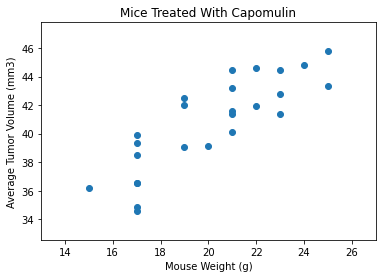

In [62]:
x_axis_ave = cap_reg["Weight (g)"]
y_axis_ave = cap_reg["Tumor Volume (mm3)"]
plt.scatter(x_axis_ave, y_axis_ave)
plt.ylim(min(y_axis_ave)-2,max(y_axis_ave)+2)
plt.xlim(min(x_axis_ave)-2, max(x_axis_ave)+2)
plt.title("Mice Treated With Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

 The correlation between mouse weight and average tumor volume is 0.84.


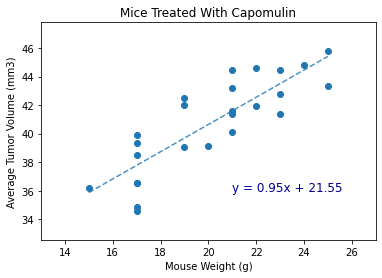

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis_ave, y_axis_ave)
print(f" The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_axis_ave, y_axis_ave)
vc_fit = vc_slope * x_axis_ave + vc_int
plt.scatter(x_axis_ave, y_axis_ave)
plt.plot(x_axis_ave, vc_fit, '--', alpha=.8)
plt.ylim(min(y_axis_ave)-2,max(y_axis_ave)+2)
plt.xlim(min(x_axis_ave)-2, max(x_axis_ave)+2)
plt.title("Mice Treated With Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.annotate(line_eq, (21,36), fontsize=12, color="darkblue")
plt.show()